In [6]:
import matplotlib as mpl
import numpy as np
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import variation

In [13]:
# Initialize an empty list to hold DataFrames
frames = []

NV_error = []
BV_error = []
TV_error = []
DV_error = []

NV_var = []
BV_var = []
TV_var = []
DV_var = []

participant = []

trials_removed = []

# Assuming file names are in the format 'participant1.csv', 'participant2.csv', etc.
# Adjust the range as per the number of participants
for i in range(1, 16):  # Change 9 to a higher number if you have more participants
    file_name = f'../data/p{i}/p{i}_main.csv'  # Constructs the file name
    df = pd.read_csv(file_name)  # Reads the file into a DataFrame
    df['participant'] = i  # Adds the participant number
    df = df.drop('block', axis=1)  # Drops the column you don't need
    
    participant.append(i)
    len1 = len(df)
    df = df[(df["move_times"] > 0.4) & (df['mean_velocity'] > 20)]
    trials_removed.append(len1 - len(df))
    frames.append(df)  # Appends the DataFrame to the list
    NV_error.append(df[(df["terminal_feedback"] == 0) & (df['vibration'] == 0)]['error'].mean())
    BV_error.append(df[(df["terminal_feedback"] == 0) & (df['vibration'] == 3)]['error'].mean())
    TV_error.append(df[(df["terminal_feedback"] == 0) & (df['vibration'] == 2)]['error'].mean())
    DV_error.append(df[(df["terminal_feedback"] == 0) & (df['vibration'] == 1)]['error'].mean())

    NV_var.append(variation(df[(df["terminal_feedback"] == 0) & (df['vibration'] == 0)]['elbow_end_deg']))
    BV_var.append(variation(df[(df["terminal_feedback"] == 0) & (df['vibration'] == 3)]['elbow_end_deg']))
    TV_var.append(variation(df[(df["terminal_feedback"] == 0) & (df['vibration'] == 2)]['elbow_end_deg']))
    DV_var.append(variation(df[(df["terminal_feedback"] == 0) & (df['vibration'] == 1)]['elbow_end_deg']))

# Concatenate all data frames
combined_df = pd.concat(frames, ignore_index=True)

data_error = pd.DataFrame({'participant': participant, 'NV': NV_error, 'BV': BV_error, 'TV': TV_error, 'DV': DV_error})
data_error.to_csv('../results/error_data.csv', index=False)

var_df = pd.DataFrame({'participant': participant, 'NV': NV_var, 'BV': BV_var, 'TV': TV_var, 'DV': DV_var})
var_df.to_csv('../results/var_data.csv', index=False)

NV_error = np.array(NV_error)
BV_error = np.array(BV_error)
TV_error = np.array(TV_error)
DV_error = np.array(DV_error)

BV_error = BV_error - NV_error
TV_error = TV_error - NV_error
DV_error = DV_error - NV_error

error_df = pd.DataFrame({'participant': participant, 'BV': BV_error, 'TV': TV_error, 'DV': DV_error})
long_df = pd.melt(error_df, id_vars=['participant'], 
                  var_name='vibration', value_name='error')

# var_df = pd.DataFrame({'participant': participant, 'BV': BV_var, 'TV': TV_var, 'DV': DV_var})
var_long_df = pd.melt(var_df, id_vars=['participant'], 
                  var_name='vibration', value_name='variation')
print(trials_removed)

[0, 5, 1, 2, 0, 5, 3, 7, 0, 0, 4, 1, 3, 4, 3]


In [9]:
mean_df = combined_df.groupby(['participant', 'vibration']).mean().reset_index()

c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

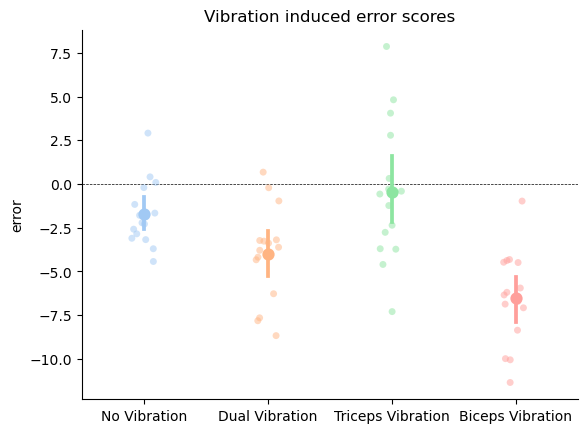

In [14]:
fig, ax = plt.subplots()
sns.stripplot(x='vibration', y='error', data=mean_df, ax=ax, hue="vibration", alpha = 0.5, palette='pastel')
sns.pointplot(x='vibration', y='error', data=mean_df, ax=ax, hue="vibration", palette='pastel')
ax.legend_.remove()
ax.set_xlabel('')
ax.set_ylabel('Target Error')
ax.set_xticklabels(['No Vibration', 'Dual Vibration', 'Triceps Vibration', 'Biceps Vibration'])
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.set_title("Vibration induced error scores")
fig.savefig('../results/error_plot.png', dpi=1200)


c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

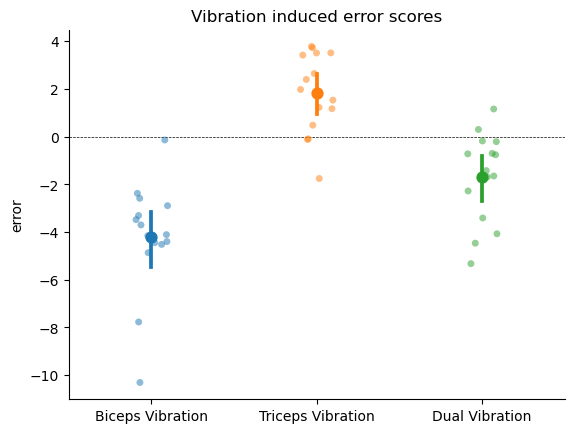

In [11]:
fig, ax = plt.subplots()
sns.stripplot(x='vibration', y='error', data=long_df, ax=ax, hue="vibration", alpha = 0.5)
sns.pointplot(x='vibration', y='error', data=long_df, ax=ax, hue="vibration")
ax.legend_.remove()
ax.set_xlabel('')
ax.set_xticklabels(['Biceps Vibration', 'Triceps Vibration', 'Dual Vibration'])
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.set_title("Vibration induced error scores")
fig.savefig('../results/error_plot.png', dpi=1200)

c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gregg\miniconda3\envs\data-science\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

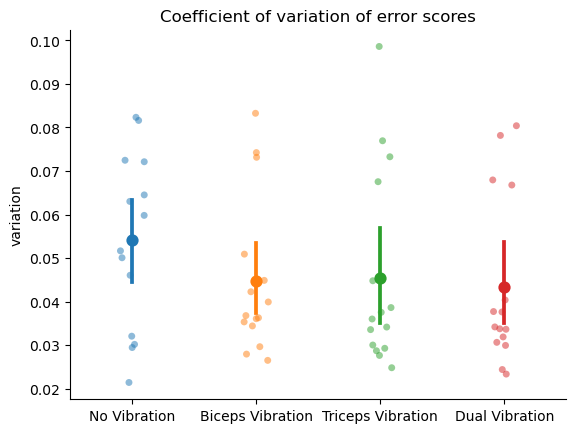

In [17]:
fig, ax = plt.subplots()
sns.stripplot(x='vibration', y='variation', data=var_long_df, ax=ax, hue="vibration", alpha = 0.5)
sns.pointplot(x='vibration', y='variation', data=var_long_df, ax=ax, hue="vibration")
ax.legend_.remove()
ax.set_xlabel('')
ax.set_xticklabels(['No Vibration', 'Biceps Vibration', 'Triceps Vibration', 'Dual Vibration'])
ax.set_title("Coefficient of variation of end points")
fig.savefig('../results/std_plot.png', dpi=1200)